## Plotting the data
Now it's time to have fun plotting the data. We need to define which axes we want to view the data along. For example, sometimes we may want to view along (1,0,0), (0,1,0) and (0,0,1), while other times, it may be useful to view along a different pair of directions, such as (1,1,0),(1,-1,0) and (0,0,1). The choice of primary axes is made using the proj dictionary, as seen below.

To make a plot, we need to cut the .sqw file in some way. We use the `cut_sqw` command for this. It takes as input the `.sqw` file, the projection axes, and four arrays: one for each primary axis, the fourth being energy. For each of the arrays, there are two options. If the user provides two values, e.g. `[-0.1,0.1]` the counts between these two values are summed, and the axis is not viewed. If the user provides three values, e.g. `[-2,0.05,1]`, the data is binned along this axis in bins starting at the first value (`-2`), with a step size of the middle value (`0.05`), ending at the last value (`1`). 

The type of cut therefore depends on how many directions the user sums over. Some examples are given below.

Details can be found in the Horace documentation: https://pace-neutrons.github.io/Horace/v4.0.0/manual/Cutting_data_of_interest_from_SQW_files_and_objects.html#cut 

In [1]:
from pace_neutrons import Matlab
m = Matlab()

Interface opened
All features have moved to hor_config
> In herbert_config (line 3)Warning: Cannot find test path, possible failed setup
!==================================================================!
!          ISIS utilities for visualization and analysis           !
!                   of neutron spectroscopy data                   !
!                          Herbert 4.0.0                           !
!------------------------------------------------------------------!
All features have moved to hor_config
!==================================================================!
!                           Horace 4.0.0                           !
!------------------------------------------------------------------!
!   Visualisation of multi-dimensional neutron spectroscopy data   !
!                                                                  !
!           R.A. Ewings, A. Buts, M.D. Le, J van Duijn,            !
!                  I. Bustinduy, and T.G. Perring                 

*** Step 1 of 1; Read data for   107965 pixels -- processing data... ----->  retained     47529 pixels


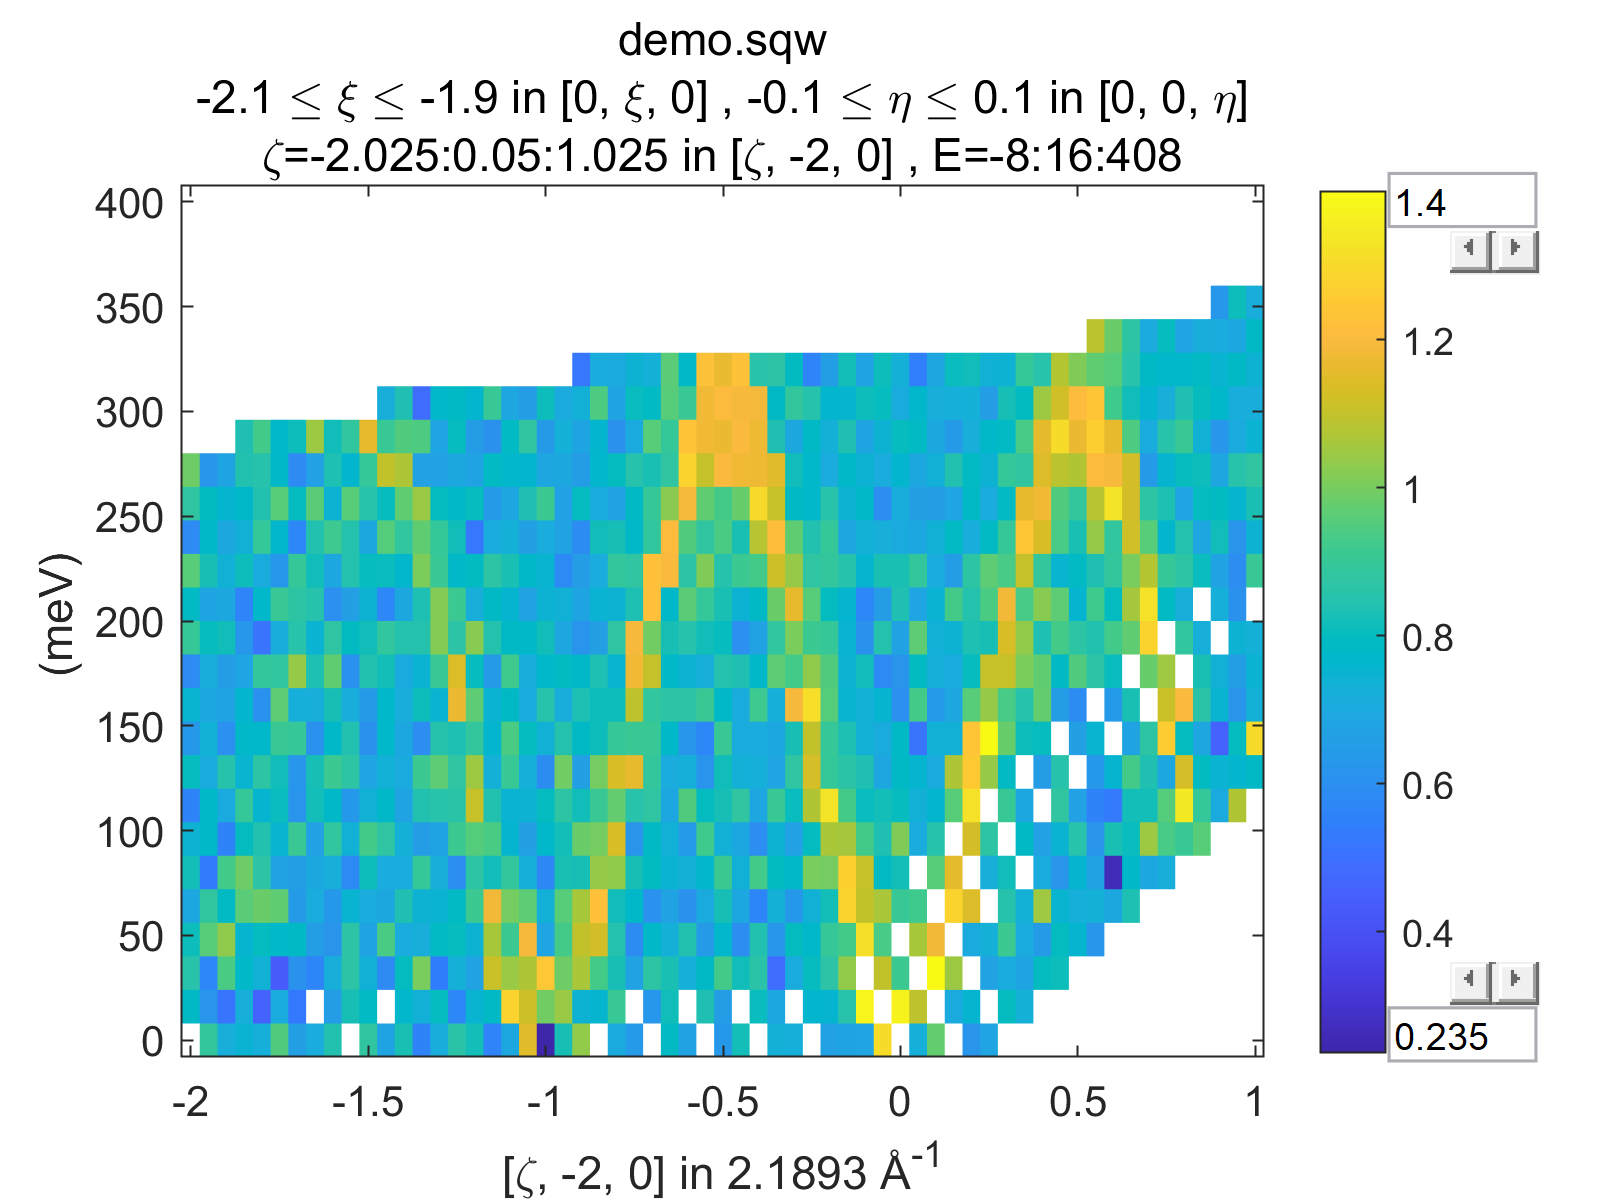

In [2]:

sqw_file = 'demo.sqw'
proj = {
    'u': [1, 0, 0],
    'v': [0, 1, 0],
    'type': 'rrr'
}

%matlab_plot_mode inline inline
%matlab_fig -w 1600 -h 1200 
# 2D slice
cc2 = m.cut_sqw(sqw_file, proj, [-2, 0.05, 1], [-2-0.1, -2+0.1], [-0.1, 0.1], [0, 16, 400])
m.plot(cc2)


# A note on figures
There are two ways to make Matlab figures in a Jupyter Notebook. Details can be found in the documentation: https://github.com/pace-neutrons/pace-python/blob/main/docs/IPythonMagics_commands.md.

The first methods is inline as shown above. As illustrated, the size of the figure can be varied as illustrated above using the `%matlab_fig -w 1600 -h 1200 ` command, where -w and -h give the width and height of the figure, respectively. The figure is simply a screenshot of the Matlab figure, and can therefore not be edited.

The second method is windowed figures, which opens a Matlab figure, which can then be edited at will. The command is `%matlab_plot_mode windowed`. We shall illustrate it in the following cell, then stick to the inline figures.

In [3]:

%matlab_plot_mode windowed
m.plot(cc2)
m.keep_figure() # Keeps the figure open instead of overwriting it with the next plot


*** Step 1 of 1; Read data for    28783 pixels -- processing data... ----->  retained      8373 pixels


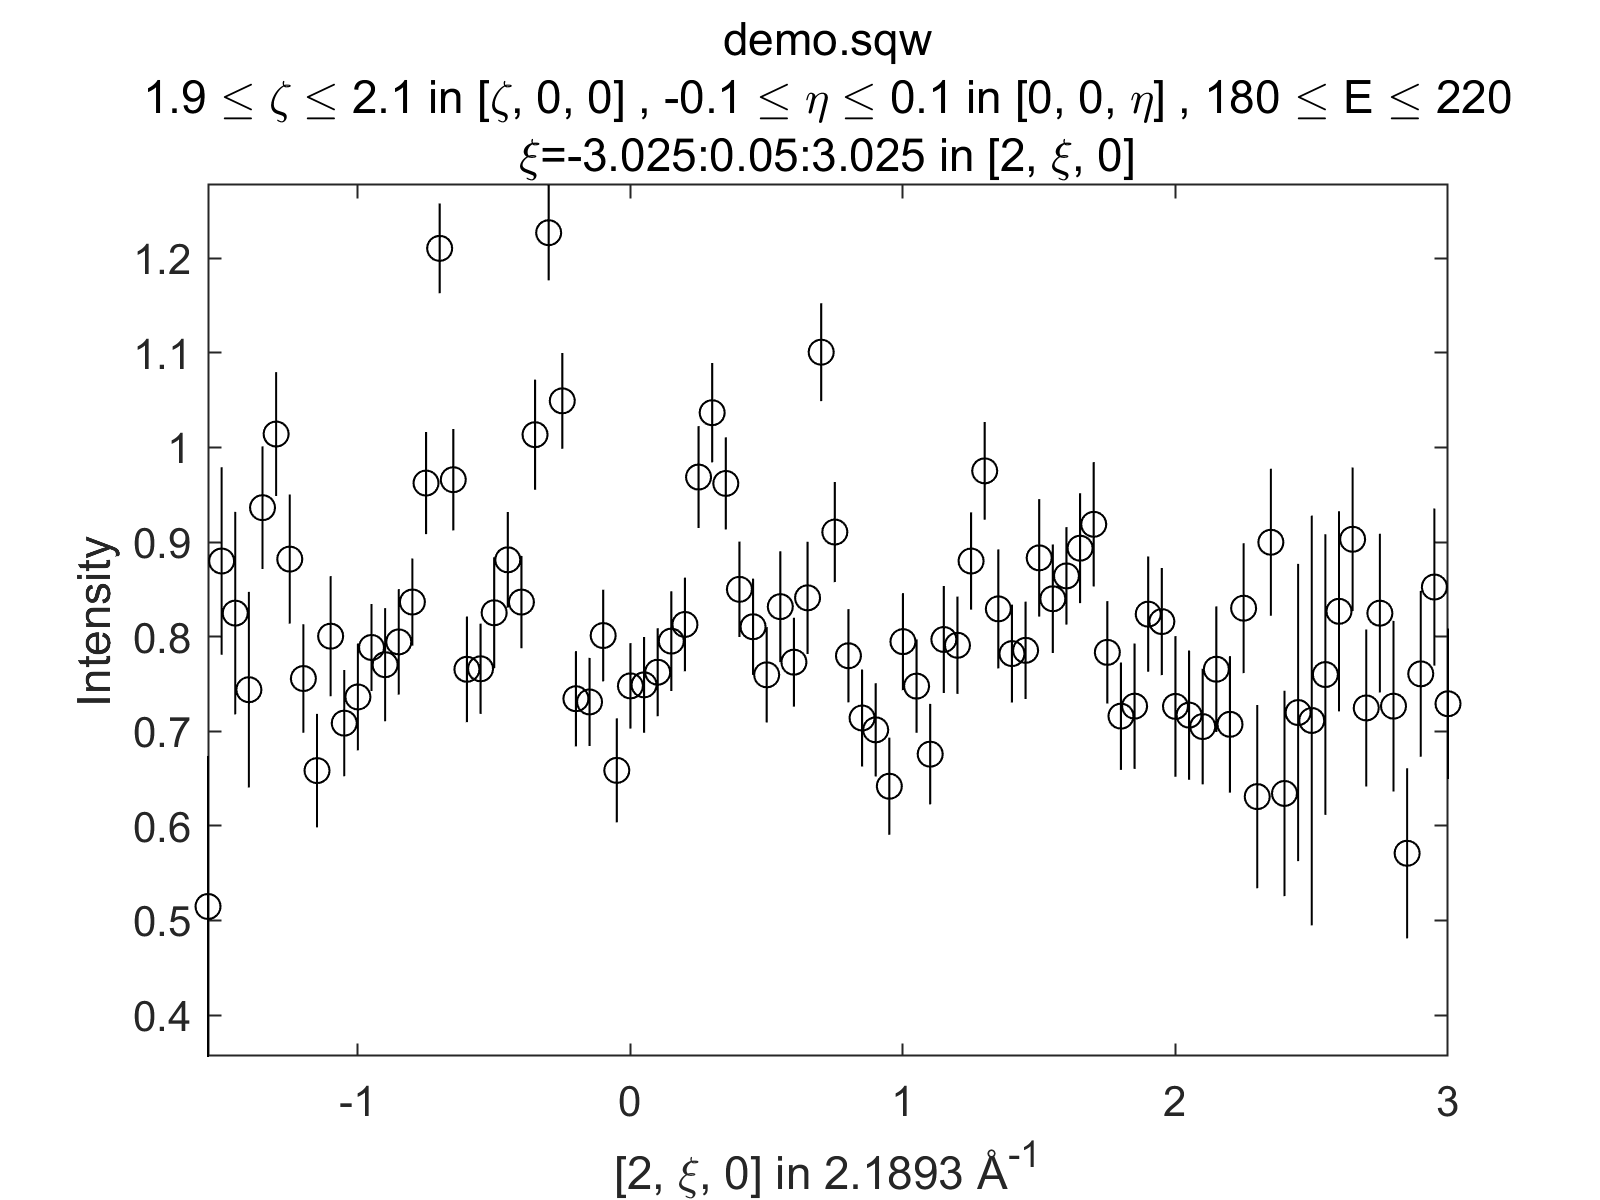

In [4]:
%matlab_plot_mode inline inline
%matlab_fig -w 1600 -h 1200 
# 1D cut
cc1 = m.cut_sqw(sqw_file, proj, [1.9, 2.1], [-3, 0.05, 3], [-0.1, 0.1], [180, 220])
m.plot(cc1)


You can also plot in 3D, and make 2D slices interactively as you please. For this, windowed mode is obviously best. Try it out, and try also to make other 1D and 2D cuts. It should look like this:

<img src='_images/sliceomatic.jpg' width='800px'></img>


You can select which surfaces to plot by clicking on the sliders next to each axis. In this example, three surfaces are shown, indicated by the green arrows.

In [5]:
%matlab_plot_mode windowed
cc3 = m.cut_sqw(sqw_file, proj, [-2, 0.05, 2], [-2, 0.05, 2], [-0.1, 0.1], [0, 16, 400])
m.plot(cc3)


*** Step 1 of 1; Read data for  1013005 pixels -- processing data... ----->  retained    678699 pixels


In [ ]:
# # Finally, let us look at spaghetti plots. 
# wsp = m.spaghetti_plot([[0, 0, 0], [0.5, 0.5, 0.5], [0.5, 0.5, 0]],sqw_file) #,'labels',{'\\Gamma','R','M'})
# m.plot(wsp)

*** Step 1 of 1; Read data for    38997 pixels -- processing data... ----->  retained      1080 pixels
*** Step 1 of 1; Read data for    64694 pixels -- processing data... ----->  retained      2051 pixels


*** spaghetti_plot: rlp found to lie in the plane perpendicular to (-0.547316 0.547316 -5.45017e-17)

